# Training basics

In [1]:
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tfe= tf.contrib.eager

In [3]:
tf.enable_eager_execution()

In [4]:
x = tf.zeros([10, 10])
x += 2
print(x)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)


In [5]:
v = tfe.Variable(1.0)
assert v.numpy() == 1.0

In [6]:
v.assign(3.0)
assert v.numpy() == 3.0

In [7]:
v.assign(tf.square(v))
assert v.numpy() == 9.0

## Linear model

In [8]:
class Model(object):
    def __init__(self):
        self.W = tfe.Variable(5.0)
        self.b = tfe.Variable(0.0)
    
    def __call__(self, x):
        return self.W * x + self.b

In [9]:
model = Model()

In [10]:
assert model(3.0).numpy() == 15.0

In [11]:
def loss(predicted_y, desired_y):
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

In [12]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

In [13]:
inputs = tf.random_normal(shape=[NUM_EXAMPLES])
noise = tf.random_normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

In [14]:
import matplotlib.pyplot as plt

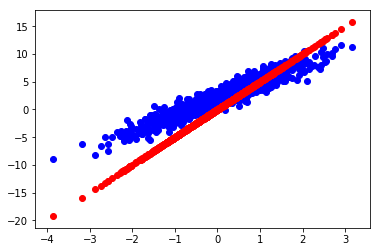

In [16]:
plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

In [17]:
print('Current Loss: ')
print(loss(model(inputs), outputs).numpy())

Current Loss: 
9.129832


In [30]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

In [31]:
model = Model()

In [32]:
Ws, bs = [], []

In [33]:
epochs = range(10)

In [34]:
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model(inputs), outputs)
    
    train(model, inputs, outputs, learning_rate=0.1)
    
    print('Epoch%2d: W=%1.2f b=%1.2f, loss=%2.5f' % 
         (epoch, Ws[-1], bs[-1], current_loss))

Epoch 0: W=5.00 b=0.00, loss=9.12983
Epoch 1: W=4.58 b=0.40, loss=6.11684
Epoch 2: W=4.25 b=0.72, loss=4.22082
Epoch 3: W=3.99 b=0.98, loss=3.02744
Epoch 4: W=3.78 b=1.18, loss=2.27616
Epoch 5: W=3.62 b=1.34, loss=1.80310
Epoch 6: W=3.50 b=1.47, loss=1.50517
Epoch 7: W=3.40 b=1.58, loss=1.31749
Epoch 8: W=3.32 b=1.66, loss=1.19924
Epoch 9: W=3.25 b=1.73, loss=1.12472


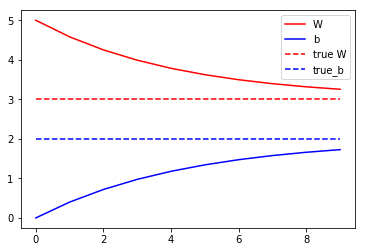

In [35]:
plt.plot(epochs, Ws, 'r',
        epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
        [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true_b'])
plt.show()